<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
%pip install seaborn

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

<details>
    <summary>Click here for Solution</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
```

</details>


### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [4]:
df = pd.read_csv(path)

<details>
    <summary>Click here for Solution</summary>

```python
df = pd.read_csv(path, header=None)
print(df.head(10))
```

</details>


Add the headers to the dataframe, as mentioned in the project scenario. 


In [5]:
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [6]:
headers=["Age","Gender","BMI","No_of_Children","Smoker","Region","Charges"]
df.columns=headers
df.head()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


<details>
    <summary>Click here for Solution</summary>

```python
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
```

</details>


Now, replace the '?' entries with 'NaN' values.


In [8]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160


<details>
    <summary>Click here for Solution</summary>

```python
df.replace('?', np.nan, inplace = True)
```

</details>


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [10]:
missing_data = df.isnull()
missing_data.head(5)

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False


In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Age
Age
False    2767
True        4
Name: count, dtype: int64

Gender
Gender
False    2771
Name: count, dtype: int64

BMI
BMI
False    2771
Name: count, dtype: int64

No_of_Children
No_of_Children
False    2771
Name: count, dtype: int64

Smoker
Smoker
False    2764
True        7
Name: count, dtype: int64

Region
Region
False    2771
Name: count, dtype: int64

Charges
Charges
False    2771
Name: count, dtype: int64



<details>
    <summary>Click here for Solution</summary>

```python
print(df.info())
```

</details>


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [13]:
avg_age = df["Age"].astype("float").mean(axis=0)
print("Average of Age:", avg_age)
df["Age"].replace(np.nan, avg_age, inplace=True)

Average of Age: 39.11709432598482


In [14]:
df['Smoker'].value_counts().idxmax()

'0'

In [15]:
df["Smoker"].replace(np.nan, '0', inplace=True)

/tmp/ipykernel_32978/831779427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Smoker"].replace(np.nan, '0', inplace=True)


In [16]:
missing_data = df.isnull()
missing_data.head(5)

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [17]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Age
Age
False    2771
Name: count, dtype: int64

Gender
Gender
False    2771
Name: count, dtype: int64

BMI
BMI
False    2771
Name: count, dtype: int64

No_of_Children
No_of_Children
False    2771
Name: count, dtype: int64

Smoker
Smoker
False    2771
Name: count, dtype: int64

Region
Region
False    2771
Name: count, dtype: int64

Charges
Charges
False    2771
Name: count, dtype: int64



<details>
    <summary>Click here for Solution</summary>

```python
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
```

</details>


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [19]:
df[["Charges"]] = np.round(df[["Charges"]],2)
print(df.head())

  Age  Gender     BMI  No_of_Children Smoker  Region   Charges
0  18       2  33.770               1      0       4   1725.55
1  28       2  33.000               3      0       4   4449.46
2  33       2  22.705               0      0       1  21984.47
3  32       2  28.880               0      0       1   3866.86
4  31       1  25.740               0      0       4   3756.62


<details>
    <summary>Click here for Solution</summary>

```python
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())
```
</details>


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


(0.0, 66902.85800000001)

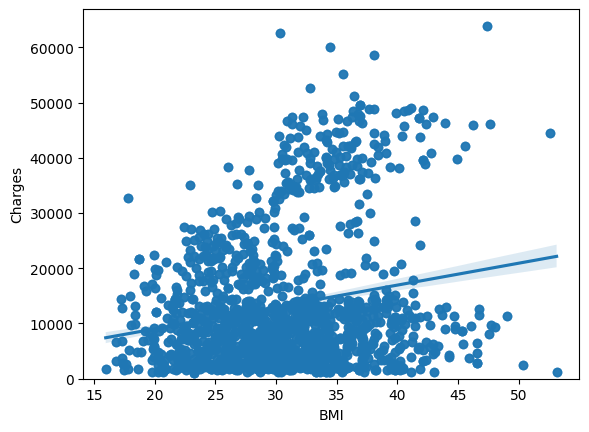

In [20]:
sns.regplot(x="BMI", y="Charges", data=df)
plt.ylim(0,)

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
```
</details>


Implement the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='Smoker', ylabel='Charges'>

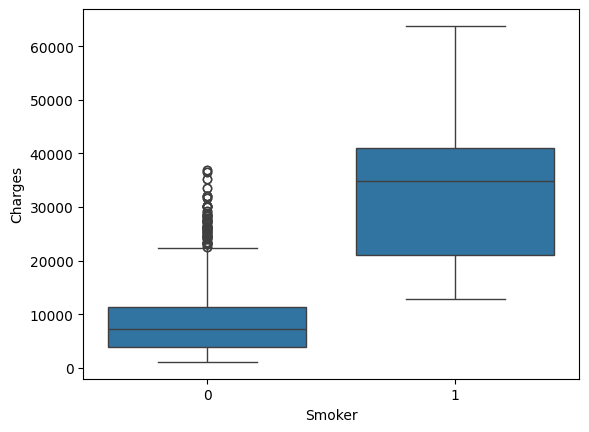

In [21]:
sns.boxplot(x="Smoker", y="Charges", data=df)

<details>
    <summary>Click here for Solution</summary>

```python
sns.boxplot(x="smoker", y="charges", data=df)
```
</details>


Print the correlation matrix for the dataset.


In [22]:
df.corr()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
Age,1.000000,-0.026578,0.112855,0.037137,-0.022289,-0.006977,0.298890
Gender,-0.026578,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
BMI,0.112855,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
No_of_Children,0.037137,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
Smoker,-0.022289,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
Region,-0.006977,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
Charges,0.298890,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


<details>
    <summary>Click here for Solution</summary>

```python
print(df.corr())
```
</details>


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [29]:
lm1 = LinearRegression()

X = df[["Smoker"]]
Y = df["Charges"]

lm1.fit(X,Y)
Y_hat1 = lm1.predict(X)

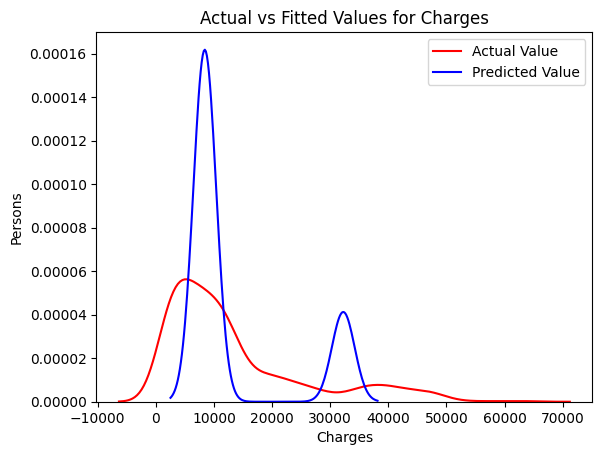

In [30]:
ax1 = sns.kdeplot(df['Charges'], color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.kdeplot(Y_hat1, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Persons')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error

print('The R-square is: ', lm1.score(X, Y))
mse = mean_squared_error(df['Charges'], Y_hat1)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.6227430402464125
The mean square error of price and predicted value is:  55706045.2359285


<details>
    <summary>Click here for Solution</summary>

```python
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))
```
</details>


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [33]:
Z = df[["Age", "Gender", "BMI", "No_of_Children", "Smoker", "Region"]]
lm1.fit(Z,Y)

LinearRegression()

In [34]:
Y_hat1 = lm1.predict(Z)
print('The R-square is: ', lm1.score(Z, Y))
mse = mean_squared_error(df['Charges'], Y_hat1)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.7505867314418195
The mean square error of price and predicted value is:  36828550.0413771


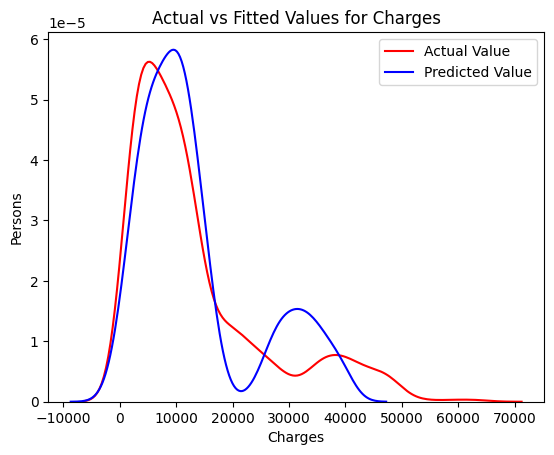

In [35]:
ax1 = sns.kdeplot(df['Charges'], color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.kdeplot(Y_hat1, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Persons')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))
```
</details>


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [36]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [37]:
Z = Z.astype(float)
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
ypipe=pipe.predict(Z)

print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  22832981.88882416
R^2 for multi-variable polynomial pipeline is:  0.845368643690203


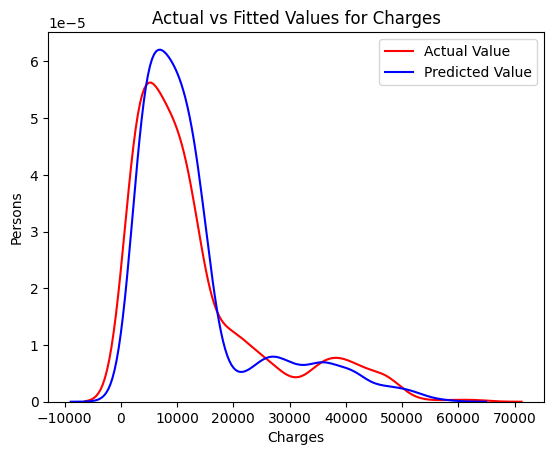

In [39]:
ax1 = sns.kdeplot(df['Charges'], color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.kdeplot(ypipe, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Charges')
plt.xlabel('Charges')
plt.ylabel('Persons')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

<details>
    <summary>Click here for Solution</summary>

```python
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))
```
</details>


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [40]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 278
number of training samples: 2493


<details>
    <summary>Click here for Solution</summary>

```python
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
```
</details>


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [51]:
RigeModel=Ridge(alpha=0.1)

In [52]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [54]:
yrige=RigeModel.predict(x_test)

print('predicted:', yrige[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 2947.3560481   2407.08440643 10175.65993671 27352.38956406]
test set : [ 3484.33  3044.21 10096.97 18033.97]


In [55]:
yhat_train=RigeModel.predict(x_train)
yhat_test=RigeModel.predict(x_test)

In [59]:
print('The R-square of Train Data is: ', RigeModel.score(x_train, y_train))
mse = mean_squared_error(y_train, yhat_train)
print('The mean square error of Train data is: ', mse)

print('The R-square of Test Data is: ', RigeModel.score(x_test, y_test))
mse = mean_squared_error(y_test, yhat_test)
print('The mean square error of Test data is: ', mse)

The R-square of Train Data is:  0.7469690366564112
The mean square error of Train data is:  37055784.72715374
The R-square of Test Data is:  0.7794196820545183
The mean square error of Test data is:  34859540.47934705


In [68]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Charges (in dollars)')
    plt.ylabel('Proportion of Persons')
    plt.show()
    plt.close()

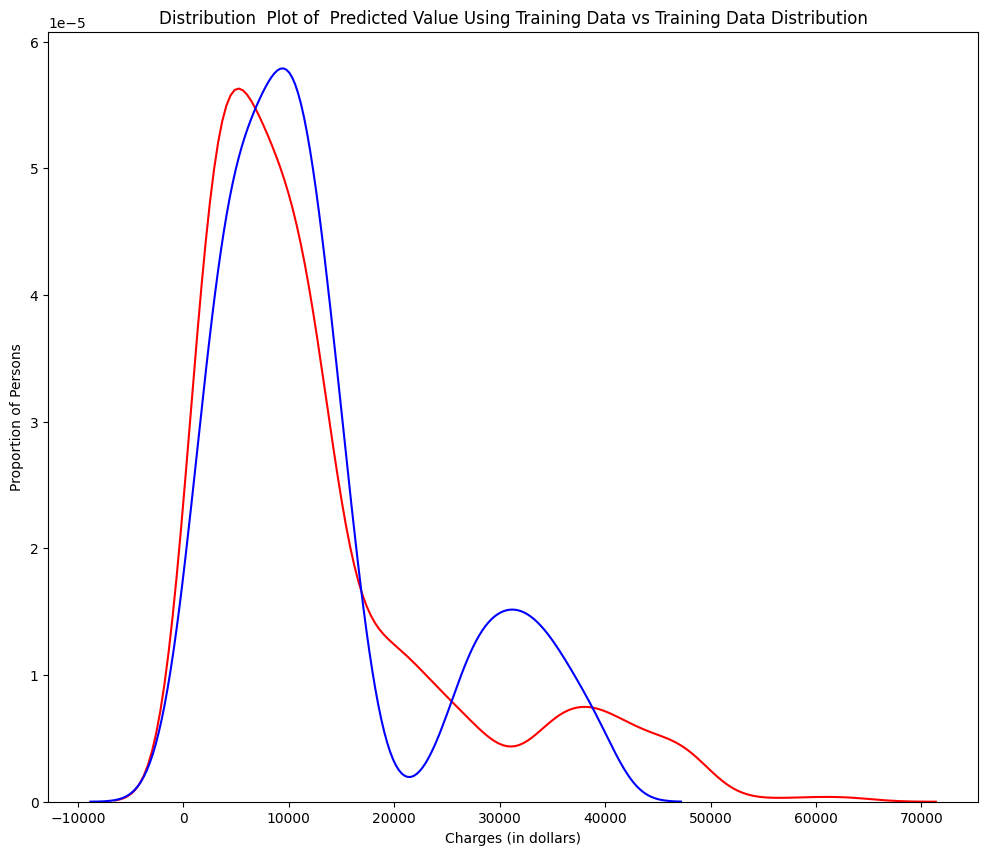

In [69]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

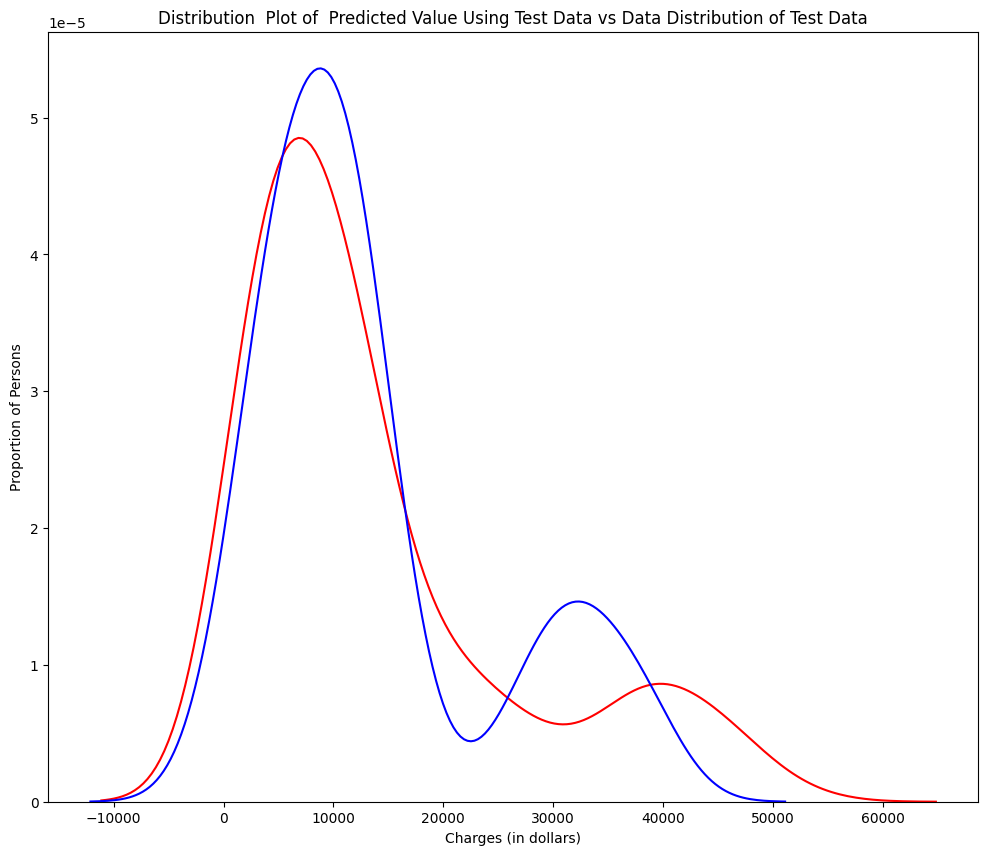

In [70]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))
```
</details>


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [71]:
RigeModel2=Ridge(alpha=0.1)

In [72]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

In [73]:
RigeModel2.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [74]:
yhat_train2=RigeModel2.predict(x_train_pr)
yhat_test2=RigeModel2.predict(x_test_pr)

In [75]:
print('The R-square of Train Data is: ', RigeModel2.score(x_train_pr, y_train))
mse = mean_squared_error(y_train, yhat_train2)
print('The mean square error of Train data is: ', mse)

print('The R-square of Test Data is: ', RigeModel2.score(x_test_pr, y_test))
mse = mean_squared_error(y_test, yhat_test2)
print('The mean square error of Test data is: ', mse)

The R-square of Train Data is:  0.8444781240372249
The mean square error of Train data is:  22775810.04271872
The R-square of Test Data is:  0.8506887655098407
The mean square error of Test data is:  23596488.89443268


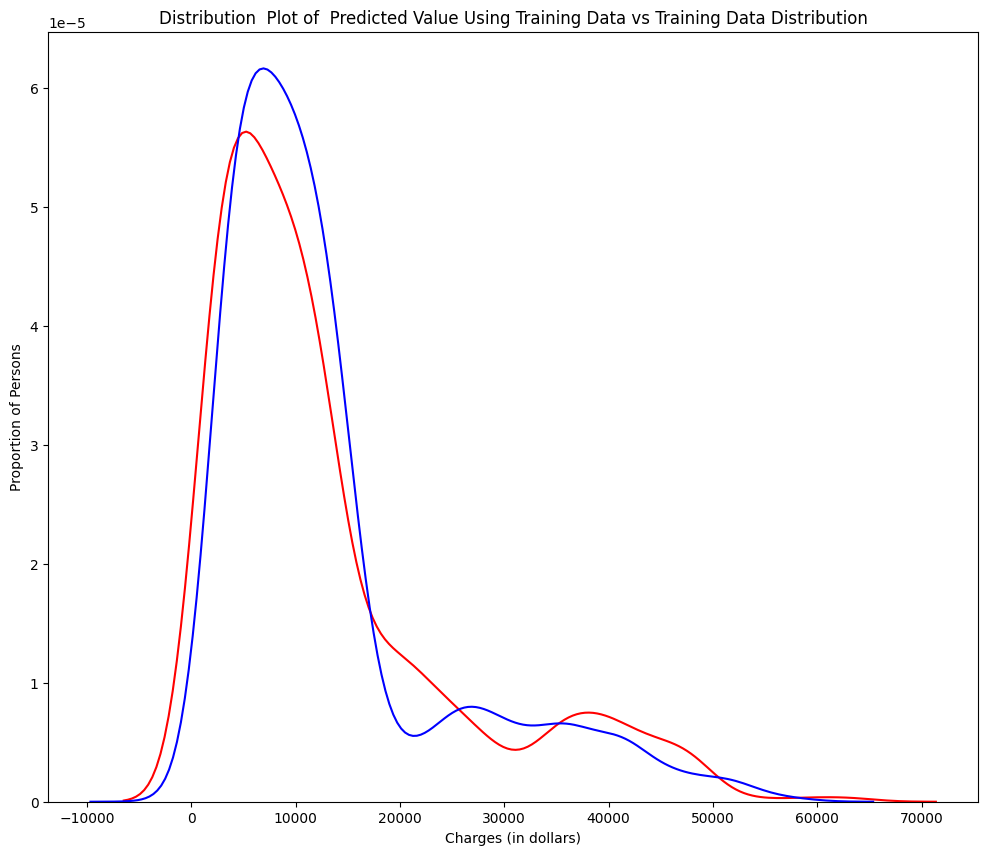

In [76]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train2, "Actual Values (Train)", "Predicted Values (Train)", Title)

<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))
```
</details>


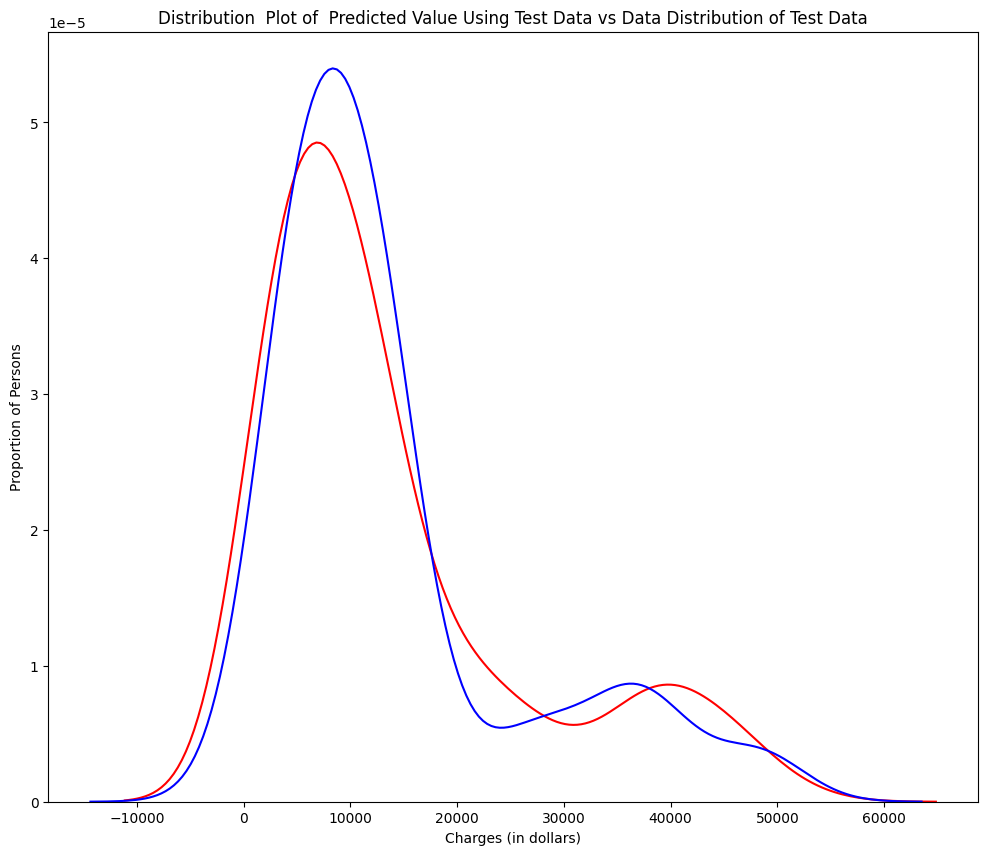

In [77]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test2,"Actual Values (Test)","Predicted Values (Test)",Title)

# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
